In [1]:
import numpy as np
import torch
from vectorhash_imported import *
from vectorhash_convered import *
from nd_scaffold import GridScaffold as GS
import math
from scipy.stats import norm
from matrix_initializers import ConstantInitializer, SparseMatrixByScalingInitializer



lambdas = [3, 4, 5]
Ng = sum([i**2 for i in lambdas])


percent_nonzero_relu=0.01
W_gh_var=1.0
sparse_initialization=0.1
T=0.01
W_hg_std = math.sqrt(W_gh_var)
W_hg_mean = (
    -W_hg_std * norm.ppf(1 - percent_nonzero_relu) / math.sqrt(len(lambdas))
)
h_normal_mean = len(lambdas) * W_hg_mean
h_normal_std = math.sqrt(len(lambdas)) * W_hg_std
relu_theta = 0

# SparseMatrixByScalingInitializer(mean=W_hg_mean, scale=W_hg_std, device="cpu")

GS = GS(
    shapes= [(3, 3), (4, 4), (5, 5)],
    N_h= 400,
    input_size= 784,
    h_normal_mean=h_normal_mean,
    h_normal_std=h_normal_std,
    device=None,
    sparse_matrix_initializer=SparseMatrixBySparsityInitializer(sparsity=0.6, device="cpu"),
    relu_theta=0.5,
    from_checkpoint=False,
    T=0.01,
    continualupdate=True,
    ratshift=False,
    initialize_W_gh_with_zeroes=False,
    pseudo_inverse=False,
    batch_update=False,
    use_h_fix=True,
    learned_pseudo=True,
    epsilon=0.01,
    calculate_update_scaling_method="norm",
    MagicMath=False,
    sanity_check=False,
    calculate_g_method="fast"
)

module shapes:  [(3, 3), (4, 4), (5, 5)]
N_g     :  50
N_patts :  3600
N_h     :  400


In [2]:
def prepare_data(
    dataset,
    num_imgs=10,
    preprocess_sensory=True,
    noise_level="medium",
    use_fix=False,
):
    import torch
    import random

    data = dataset.data
    # print(num_imgs)
    # print(data.shape)
    data = data.reshape(data.shape[0], -1)
    # print(data.shape)
    data = torch.tensor(data[:num_imgs]).float().to("cpu")
    # print(data.shape)

    # data = random.sample(dataset.data.flatten(1).float().to("cpu"), num_imgs)
    if preprocess_sensory:
        if use_fix:
            for i in range(len(data)):
                data[i] = (data[i] - data[i].mean()) / data[i].std()
        else:
            data = (data - data.mean()) / data.std()
    # noissing the data
    if noise_level == "none":
        return data, data
    elif noise_level == "low":
        random_noise = torch.zeros_like(data).uniform_(-1, 1)
    elif noise_level == "medium":
        random_noise = torch.zeros_like(data).uniform_(-1.25, 1.25)
    elif noise_level == "high":
        random_noise = torch.zeros_like(data).uniform_(-1.5, 1.5)
    noisy_data = data + random_noise

    return data, noisy_data

In [3]:
from vectorhash_functions import solve_mean, spacefillingcurve
import torchvision
from torchvision import transforms
import torch

transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Lambda(lambda x: x.flatten())]
)
dataset = torchvision.datasets.MNIST(
    root="data", train=True, download=True, transform=transform
)

data, noisy_data = prepare_data(
    dataset,
    num_imgs=100,
    preprocess_sensory=True,
    noise_level="none",
)

shapes = [(3, 3), (4, 4), (5, 5)]


v = spacefillingcurve(shapes)

Hpoints = GS.learn_path(observations=data, velocities=v[: len(data)])
# print(len(v[: len(data)]))

recalled_imgs = GS.recall(noisy_data)


/var/folders/q_/hxdspxw938n3_89qddxh_2fm0000gp/T/ipykernel_84794/4136715966.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  data = torch.tensor(data[:num_imgs]).float().to("cpu")
/Users/Ile-Maurice/Desktop/rl-research-main/rl-research/vectorhash/nd_scaffold.py:547: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3729.)
  1 + input.T @ self.inhibition_matrix_hs @ input


image 1
Unique Hs seen while recalling: 1
Unique Gs seen while recalling (before denoising): 1
Unique Gs seen while recalling (after denoising): 1
Unique Hs seen while recalling (after denoising): 1
avg nonzero H: 111.0
avg nonzero H_denoised: 111.0
tensor([1.0000e+00, 3.7835e-44, 3.7835e-44, 3.7835e-44, 3.7835e-44, 3.7835e-44,
        3.7835e-44, 3.7835e-44, 3.7835e-44, 1.0000e+00, 3.7835e-44, 3.7835e-44,
        3.7835e-44, 3.7835e-44, 3.7835e-44, 3.7835e-44, 3.7835e-44, 3.7835e-44,
        3.7835e-44, 3.7835e-44, 3.7835e-44, 3.7835e-44, 3.7835e-44, 3.7835e-44,
        3.7835e-44, 1.0000e+00, 3.7835e-44, 3.7835e-44, 3.7835e-44, 3.7835e-44,
        3.7835e-44, 3.7835e-44, 3.7835e-44, 3.7835e-44, 3.7835e-44, 3.7835e-44,
        3.7835e-44, 3.7835e-44, 3.7835e-44, 3.7835e-44, 3.7835e-44, 3.7835e-44,
        3.7835e-44, 3.7835e-44, 3.7835e-44, 3.7835e-44, 3.7835e-44, 3.7835e-44,
        3.7835e-44, 3.7835e-44])
first H is G 0 times W_hg tensor([False,  True, False,  True, False,  True,  

In [4]:
print(len(Hpoints))
for i in Hpoints:
    print(i.shape)

12
torch.Size([400])
torch.Size([50])
torch.Size([1, 50])
torch.Size([1, 50])
torch.Size([1, 50])
torch.Size([1, 50])
torch.Size([1, 50])
torch.Size([1, 50])
torch.Size([1, 50])
torch.Size([1, 50])
torch.Size([1, 50])
torch.Size([1, 50])


In [5]:
for i in range(len(Hpoints)-2):
    Hpoints[i+2] = Hpoints[i+2][0]
#normalize each grid state to a probability distribution
print(Hpoints)

[tensor([0.0000, 0.0000, 0.0000, 0.0000, 1.5919, 0.0000, 0.0000, 0.0000, 0.3810,
        0.0000, 0.0000, 0.3180, 2.4200, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.6902, 0.9795, 0.0000, 1.6467, 0.0000, 0.0000, 1.5437, 0.0000,
        0.0000, 0.8915, 0.0000, 0.1492, 0.0000, 0.0000, 2.0726, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0899, 0.0000,
        0.0000, 0.0147, 0.0000, 0.0000, 0.4045, 1.0743, 0.0000, 0.0000, 1.3115,
        0.0000, 1.9361, 0.0000, 0.4492, 0.0000, 0.0000, 1.4227, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.2250, 0.0000, 0.6498, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.7095, 0.7227, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.3547,
        0.4975, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.7556, 0.0000, 0.0000, 0.0000,

In [18]:
from vectorhash_functions import *

T=1
coords = []
for i in range(11):
    a = (Hpoints[i+1][:9])
    norm = [float(i)/sum(a) for i in a]
    coords.append(ConvertToXYNew(torch.nn.functional.softmax(torch.tensor(a/2)), [3, 3]))
 
oldcoords = []
for i in range(11):
    a = Hpoints[i+1][:9]
    print(a)
    print(a.shape)
    oldcoords.append(ConvertXtoYOld(torch.nn.functional.softmax(a), [3, 3]))


/var/folders/q_/hxdspxw938n3_89qddxh_2fm0000gp/T/ipykernel_84794/226521038.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  coords.append(ConvertToXYNew(torch.nn.functional.softmax(torch.tensor(a/2)), [3, 3]))
/var/folders/q_/hxdspxw938n3_89qddxh_2fm0000gp/T/ipykernel_84794/226521038.py:8: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  coords.append(ConvertToXYNew(torch.nn.functional.softmax(torch.tensor(a/2)), [3, 3]))


tensor([1.0000e+00, 3.7835e-44, 3.7835e-44, 3.7835e-44, 3.7835e-44, 3.7835e-44,
        3.7835e-44, 3.7835e-44, 3.7835e-44])
torch.Size([9])
tensor([7.7871, 7.0426, 4.0726, 3.2281, 3.1765, 3.2401, 2.8105, 2.5058, 3.1954])
torch.Size([9])
tensor([ 9.8552, 10.5872,  4.9030,  3.5088,  3.6109,  3.6418,  3.1223,  2.7062,
         3.5916])
torch.Size([9])
tensor([10.6332, 11.5762,  7.0817,  3.1974,  3.4605,  3.5420,  2.9687,  2.6557,
         3.4171])
torch.Size([9])
tensor([13.1653, 12.4211,  6.3414,  2.9144,  3.1603,  3.2603,  2.6003,  2.3506,
         3.1467])
torch.Size([9])
tensor([13.2357, 15.2665,  7.0802,  2.8360,  3.0696,  3.1519,  2.6556,  2.3287,
         3.0502])
torch.Size([9])
tensor([15.1213, 16.4167, 10.0138,  3.1626,  3.2377,  3.3446,  2.8826,  2.4755,
         3.3141])
torch.Size([9])
tensor([10.0767, 11.9651,  7.3818,  6.6959,  5.4001,  4.8518,  3.1566,  3.0268,
         3.8845])
torch.Size([9])
tensor([ 9.3608, 11.2301,  7.5555,  6.5135,  7.0998,  5.6179,  2.8518,  2.9010

/var/folders/q_/hxdspxw938n3_89qddxh_2fm0000gp/T/ipykernel_84794/226521038.py:15: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  oldcoords.append(ConvertXtoYOld(torch.nn.functional.softmax(a), [3, 3]))


In [11]:
a = Hpoints[2][:9]
print(a)
norm = [float(i)/sum(a) for i in a]
print(sum(norm))
print(norm)
print(ConvertToXYNew(torch.tensor(a), [3, 3]))

tensor([7.7871, 7.0426, 4.0726, 3.2281, 3.1765, 3.2401, 2.8105, 2.5058, 3.1954])
tensor(1.0000)
[tensor(0.2101), tensor(0.1900), tensor(0.1099), tensor(0.0871), tensor(0.0857), tensor(0.0874), tensor(0.0758), tensor(0.0676), tensor(0.0862)]
(tensor(1.3696), tensor(0.9803))


/var/folders/q_/hxdspxw938n3_89qddxh_2fm0000gp/T/ipykernel_84794/555237361.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  print(ConvertToXYNew(torch.tensor(a), [3, 3]))


In [8]:
a = Hpoints[4][:16]
print(a)
print(ConvertXtoYOld(a, [3,3]))

tensor([10.6332, 11.5762,  7.0817,  3.1974,  3.4605,  3.5420,  2.9687,  2.6557,
         3.4171,  5.8069,  7.2432,  5.0691,  5.9704,  1.8096,  1.9842,  1.8799])
(tensor(1.5000), tensor(0.5000))


In [9]:
print(coords)

[(tensor(0.5000), tensor(0.5000)), (tensor(1.3696), tensor(0.9803)), (tensor(1.3713), tensor(0.8981)), (tensor(1.4220), tensor(0.8285)), (tensor(1.3346), tensor(0.7730)), (tensor(1.3683), tensor(0.7402)), (tensor(1.3985), tensor(0.7216)), (tensor(1.4066), tensor(0.9591)), (tensor(1.4503), tensor(1.0073)), (tensor(1.4409), tensor(1.1477)), (tensor(1.4258), tensor(1.1298))]


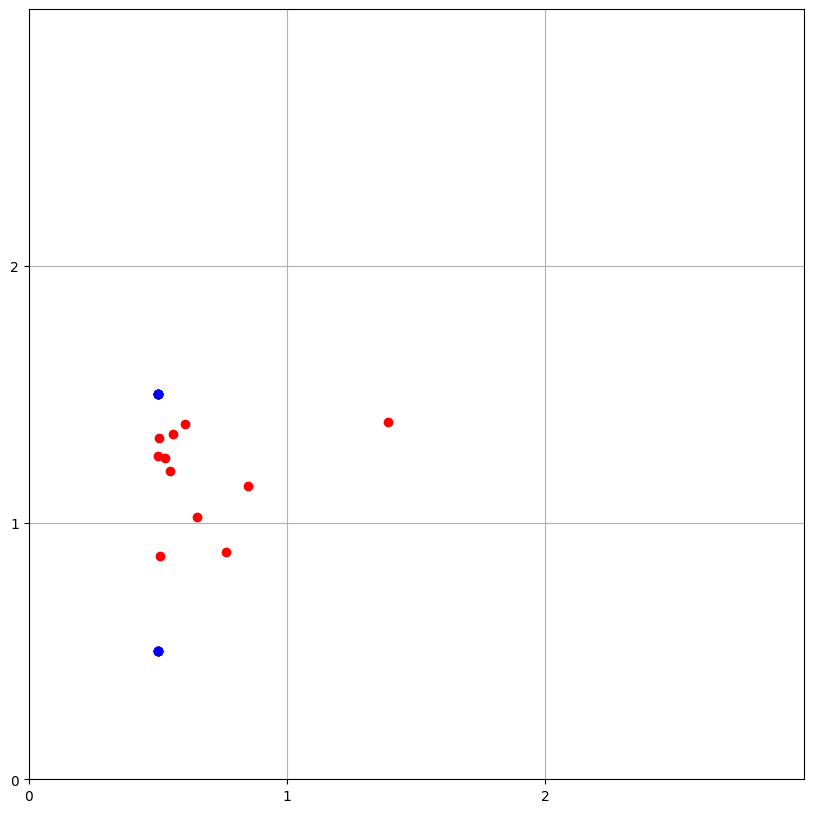

In [19]:
GraphGrid((3,3), [coords, oldcoords])